In [353]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns 
import numpy as np
import itertools
import sklearn

%matplotlib inline

In [354]:
glass = pd.read_csv('glass.data')
glass.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [355]:
glass.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Corresponding columns are as follows (taken from: https://archive.ics.uci.edu/ml/datasets/Glass+Identification):

ID: ID number of the glass 
RI: Refractive index 
Na: Sodium (Measured in weight percent for a corresponding oxide, as are the rest of the elements) 
Mg: Magnesium 
Al: Aluminum 
Si: Silicon 
K: Potassium 
Ca: Calcium 
Ba: Barium 
Fe: Iron Type: 
Type of glass (class attribute): 
Where class_attribute means: 
    1: Building windows that are float processed 
    2: Building windows that are not float processed 
    3: Vehicle windows that are float processed 
    4: Vehicle windows that are not float processed 
    5: Containers 
    6: Tableware 
    7: Headlamps

What does a glass being float processed mean?

Information from this taken from: https://glassdoctor.com/expert-tips/all-about-glass/float-glass

Float glass is a smooth, distortion-free glass that is used for designing other glass items.

Plate glass used to be prevalent in the United States until float glass was perfected. Plate glass is no longer used since it presents a more severe safety hazard than float glass does, and it has poor energy efficiency.

We want to identify different types of glass since it may be useful for different occupations like forensic analysis as the website suggests.


In [356]:
#11 columns with 213 observations

print(glass.shape)

(213, 11)


In [357]:
#Do we have null values?

glass.isnull().sum()

#Doesn't look like it

ID      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [358]:
#Overall description of the data including mean std and quartile information

glass.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [359]:
#What data types do we have?

glass.info()

#We have ints and floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      213 non-null    int64  
 1   RI      213 non-null    float64
 2   Na      213 non-null    float64
 3   Mg      213 non-null    float64
 4   Al      213 non-null    float64
 5   Si      213 non-null    float64
 6   K       213 non-null    float64
 7   Ca      213 non-null    float64
 8   Ba      213 non-null    float64
 9   Fe      213 non-null    float64
 10  Type    213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


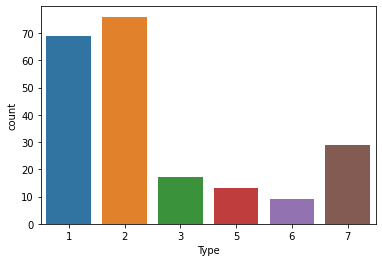

In [360]:
sns.countplot(x='Type', data=glass)
plot.show()

We have ~ 69 glass of type 1 (Building windows that are float processed)
We have ~ 72 glass of type 2 (Building windows that are not float processed)
We have ~ 18 glass of type 3 (Vehicle windows that are float processed)

We have 0 glass of type 4 (It was mentioned in the dataset that there is no data corresponding to type 4)
Type 4 would have been vehicle windows that are not float processed

We have ~ 11 glass of type 5 (Containers)
We have ~10 glass of type 6 (Tableware)
We have ~28 glass of type 7 (Headlamps)

We can notice right away that type 1 glass and type 2 glass are two of the most predominant glass types. This will become important to realize later to come up with a generalized model, the class types here look to be very imbalanced.

In [361]:
#ID probably isn't a very helpful column to include so lets exclude it for now

glass.drop('ID', axis=1, inplace=True)

In [362]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


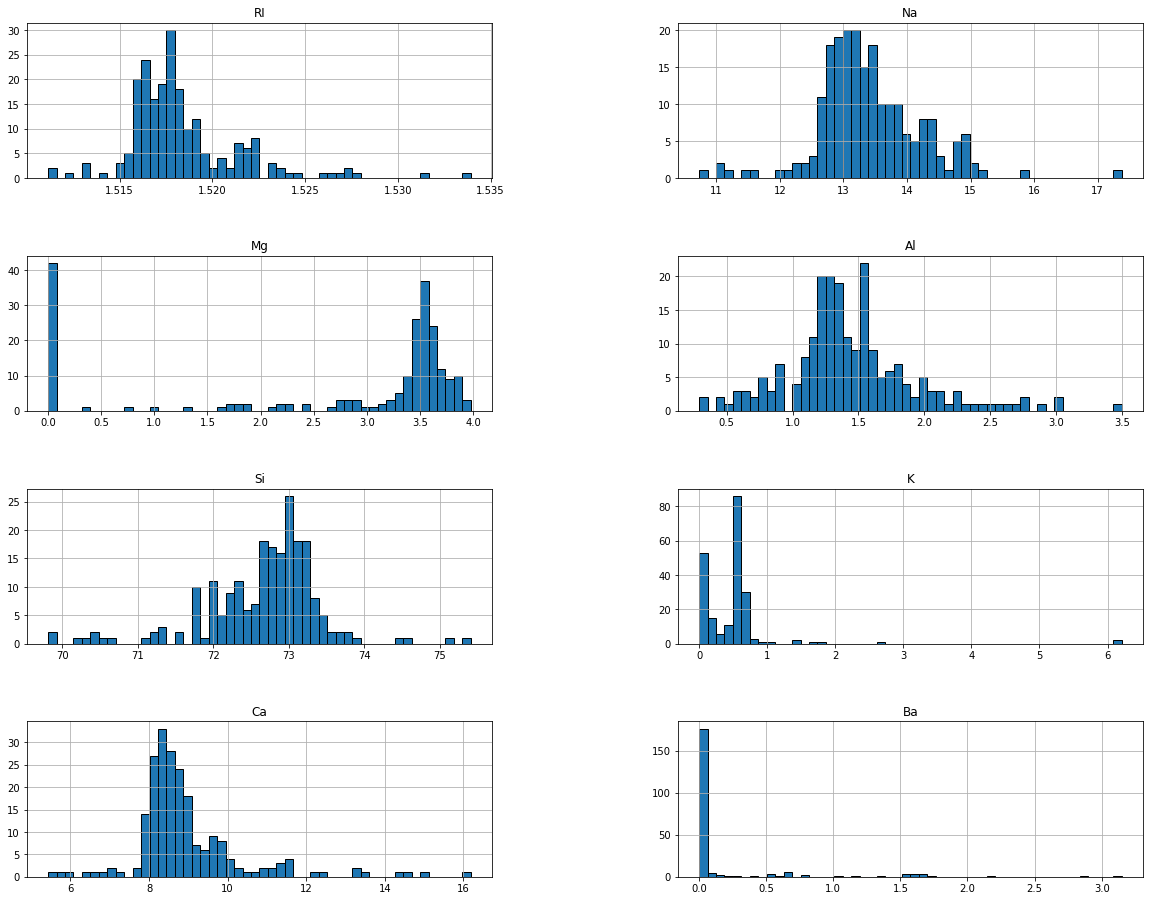

In [383]:
columns = glass.columns[:8]
plot.subplots(figsize=(20,20))
length = len(columns)

for i, j in itertools.zip_longest(columns, range(length)):
    plot.subplot(5, 2, j+1)
    plot.subplots_adjust(wspace=.4, hspace=.5)
    glass[i].hist(bins=50, edgecolor='black')
    plot.title(i)
plot.show()

Here we can see the general distribution for each element

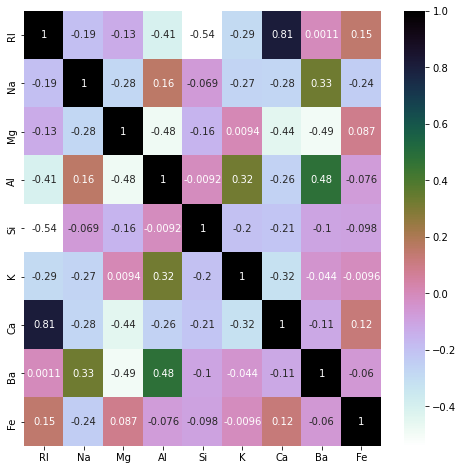

In [364]:
plot.figure(figsize=(8,8))
corr = glass.corr().filter(regex = '^(?!.*(Type))', axis = 0).filter(regex = '^(?!.*(Type))', axis = 1)
sns.heatmap(corr, annot=True, cmap='cubehelix_r')
plot.show()

This heatmap shows the correlation between different elements

We can notice that most of the correlations here are insignificant with a few exceptions.

We can spot a significant correlation between aluminum and barium for example, 
we can spot a very significant correlation between RI and Calcium.

We can remember this data for later when we train different models to determine which features we should use.

c:\users\tyle\desktop\python3.9\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\tyle\desktop\python3.9\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\tyle\desktop\python3.9\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

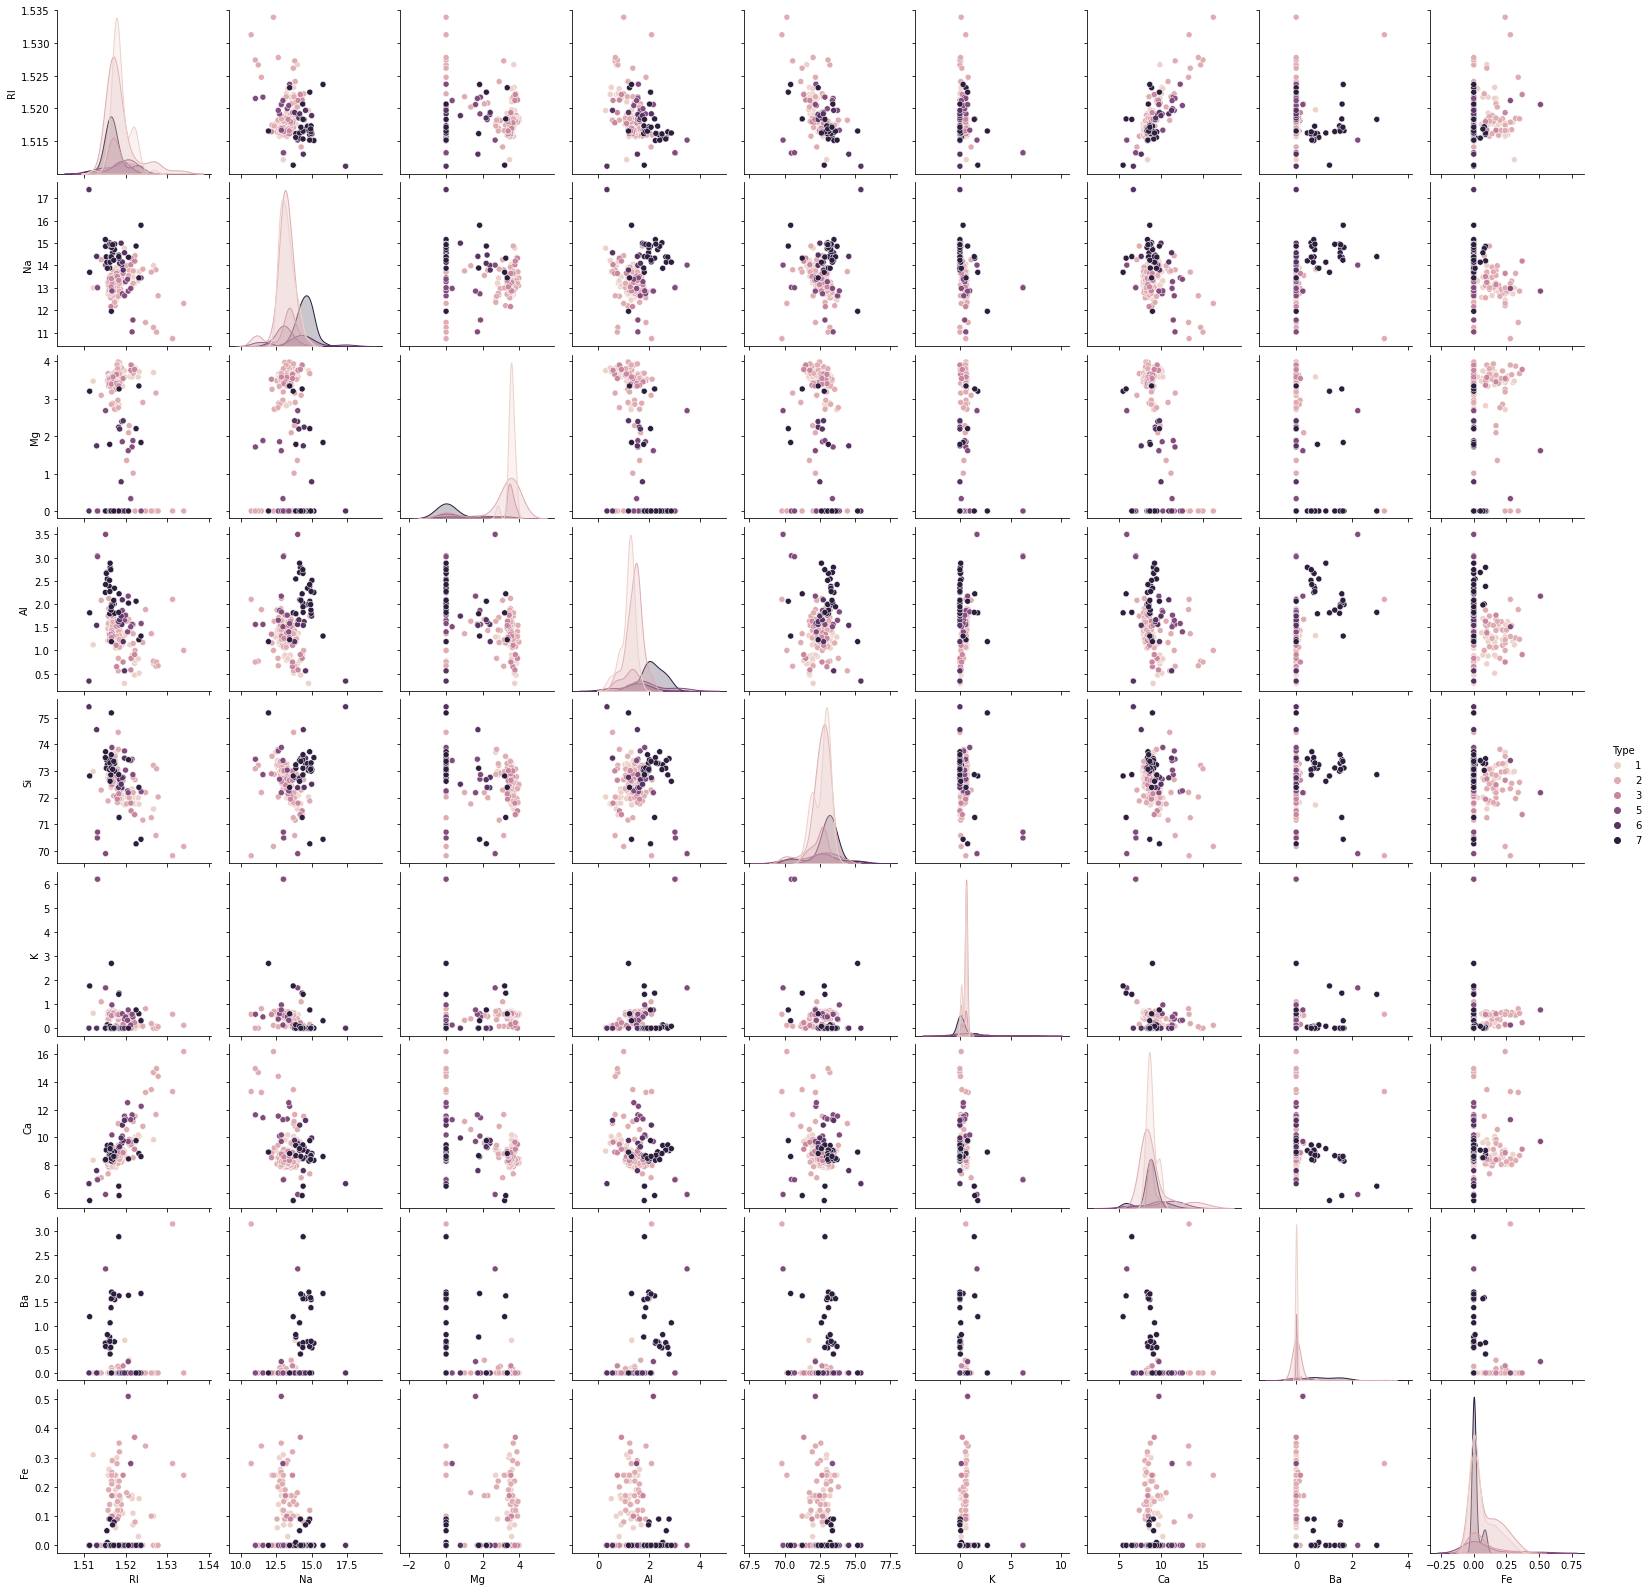

In [365]:
sns.pairplot(data=glass, hue='Type', diag_kind='kde')
plot.show

We can spot a few useful delineations between the different types, for example with Iron it looks like type 7 glass doesn't go past a certain point, (0). Meaning that we can likely distinguish between type 7 glass easily by noticing that type 7 glass just doesn't contain any iron. 

For barium it looks like type 7 glass is more likely to contain more barium than the other types.


Most of the graphs don't seem to share a particular distinction in classes apart from what was discussed before. 

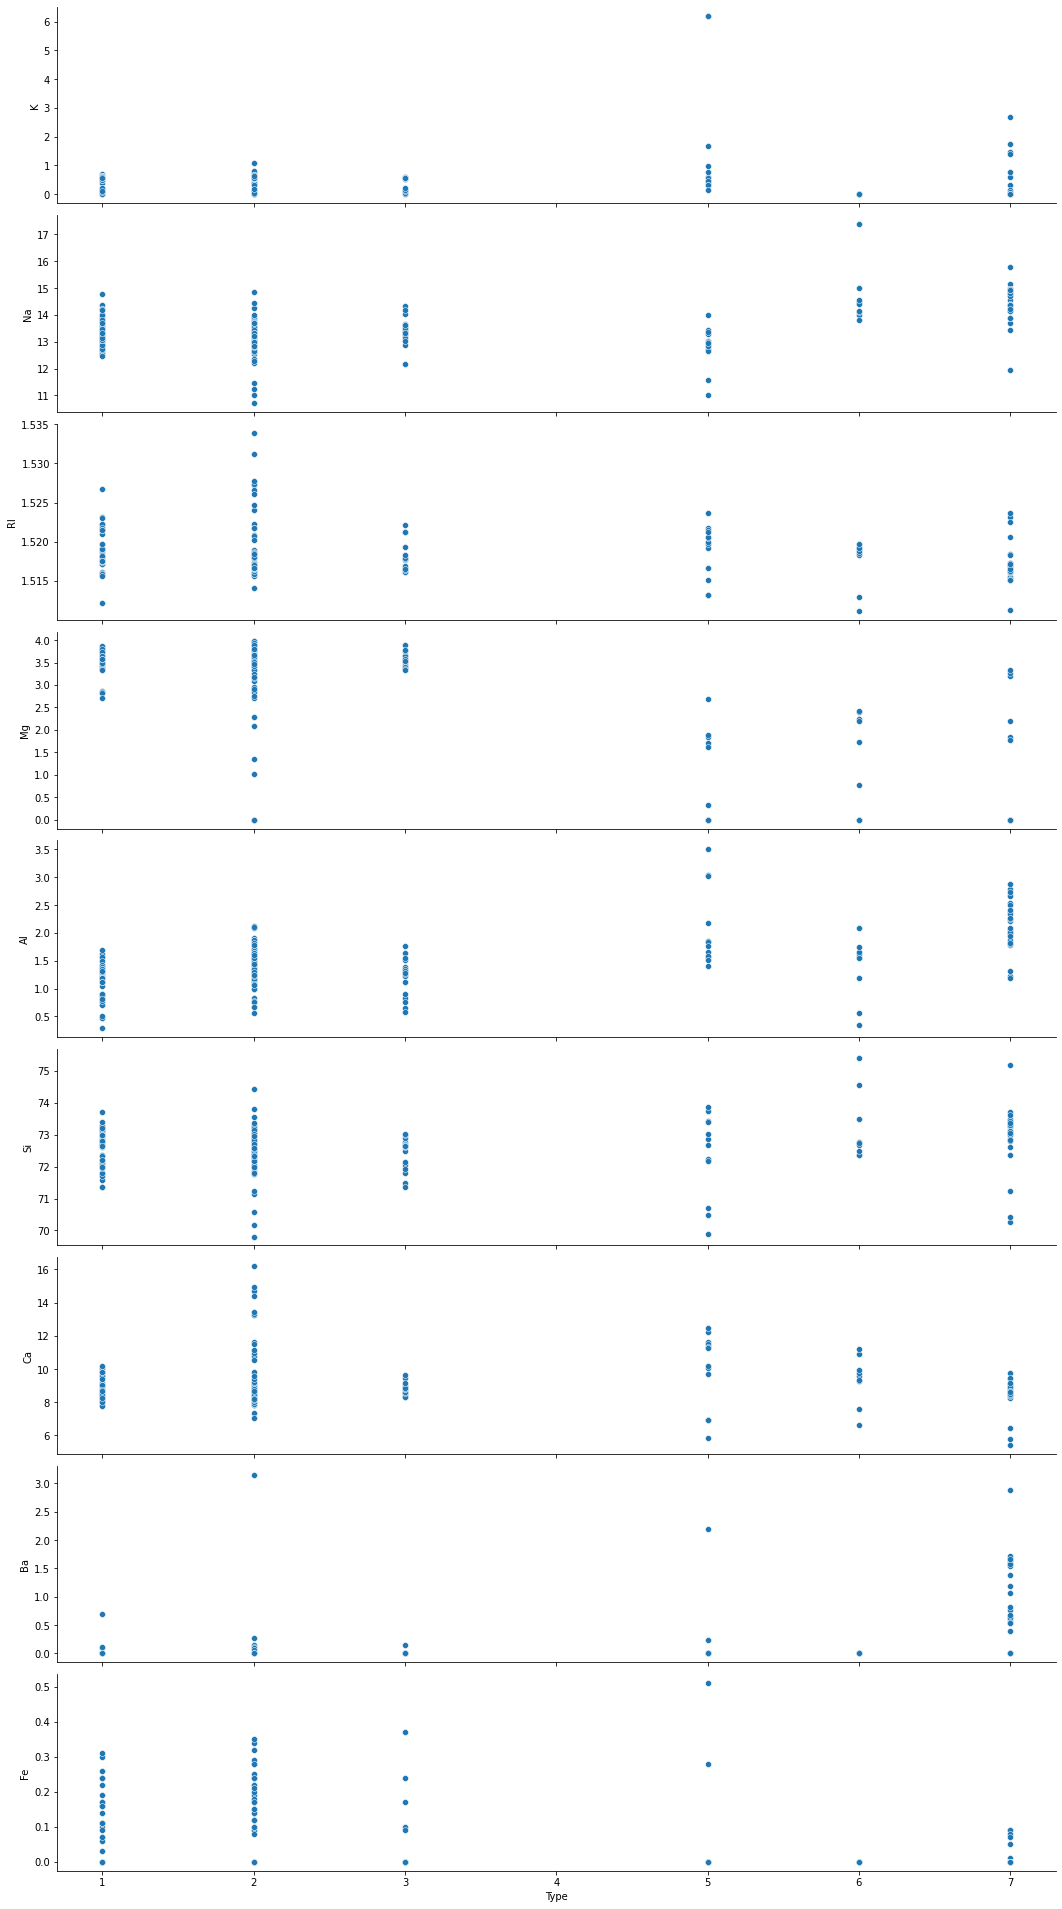

In [366]:
sns.pairplot(data=glass, x_vars='Type', y_vars=['K', 'Na', 'RI', 'Mg', 'Al', 'Si', 'Ca', 'Ba', 'Fe'], height=3, aspect=5)

This looks like a good fit for KNN analysis


However we need to be very careful since we have very imbalanced classes, if you look at the first graph in this jupyter notebook you will notice that the type 1 and type 2 completely outbalance all of the other types of glasses. We should stratify the data so that we have proportionate data for all types so that we can generalize our model better.

Use random forest classifier to see which features we should use.

In [367]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, max_depth = 4, random_state = 0)
x = glass[glass.columns[:9]]
y = glass['Type']
model.fit(x,y)
pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)

Al    0.196744
Ba    0.175458
RI    0.142498
Mg    0.133546
Na    0.111229
Ca    0.097080
K     0.065077
Si    0.052610
Fe    0.025756
dtype: float64

Important features are Al, Ba, Ri, and Mg

This may be important later for feature selection, see how the models perform without it first.

We are planning on using PCA later for dimension reduction, so we must normalize the data beforehand.

In [368]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler



data = glass[glass.columns[:9]]





train, test = train_test_split(glass, test_size = .25, random_state=0, stratify=glass['Type'])
trainX = train[train.columns[:9]]
testX = test[test.columns[:9]]
trainY = train['Type']
testY = test["Type"]



normal = MinMaxScaler().fit(trainX)
trainXNormal = normal.transform(trainX)
testNormal = normal.transform(testX)



Use KNN to train this dataset

In [369]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle=False).split(range(25))

Dataset contains 25 observations, will run for five iterations

Look for an optimal value for k

In [370]:
k_range = range(1, 26)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainXNormal, trainY)
    prediction = knn.predict(testNormal)
    scores.append(metrics.accuracy_score(testY, prediction))
    
print(scores)

[0.7222222222222222, 0.6851851851851852, 0.6851851851851852, 0.7037037037037037, 0.7777777777777778, 0.6851851851851852, 0.7407407407407407, 0.6851851851851852, 0.7222222222222222, 0.7222222222222222, 0.6851851851851852, 0.6666666666666666, 0.6296296296296297, 0.6666666666666666, 0.6851851851851852, 0.7222222222222222, 0.7222222222222222, 0.7407407407407407, 0.7407407407407407, 0.7222222222222222, 0.7037037037037037, 0.7037037037037037, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852]


Text(0, 0.5, 'Testing Accuracy')

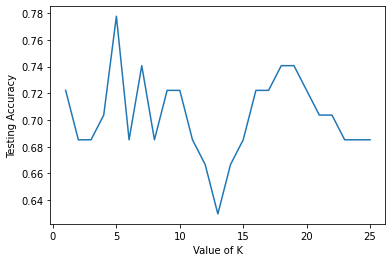

In [371]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

K = 5 is our highest accuracy model

Look at KNN


Since we have 9 variables it is impossible to plot either the decision surface or the confusion matrix as it is now, we need some way to compress it to show as a 2D image, that is why I am importing PCA to compress the features down into a single 2D image that can be viewed.


PCA stands for Principle Component Analysis it is a dimension reduction method that works well with large datasets.


The accuracy of KNN is 0.7777777777777778


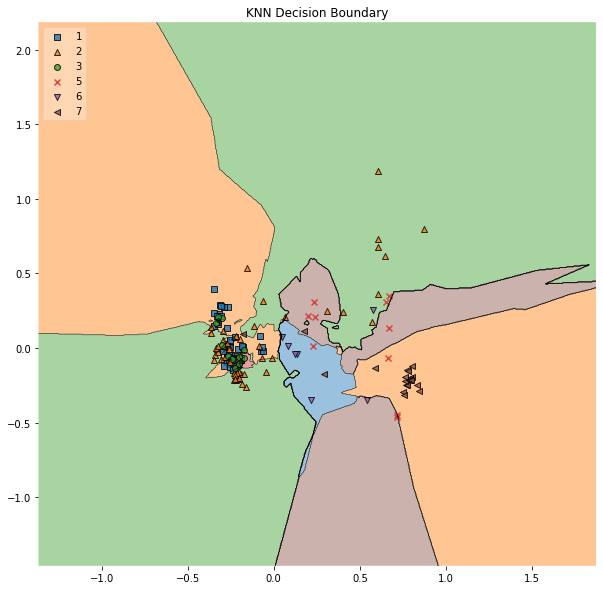

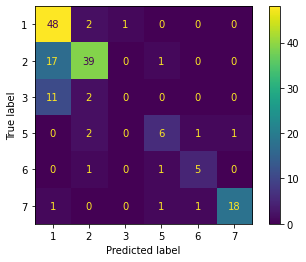

In [372]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
import matplotlib.pyplot as pl

%matplotlib inline

if type(trainY) is np.ndarray:
    print('Already verified')
    
else:
    trainY = trainY.to_numpy()


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainXNormal, trainY)
prediction = knn.predict(testNormal)

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(trainXNormal)
knn.fit(X_train2, trainY)
plot.figure(figsize=(10,10))
plot.title('KNN Decision Boundary')
plot_decision_regions(X_train2, trainY, clf=knn, legend=2)
plot_confusion_matrix(knn, X_train2, trainY)

print('The accuracy of KNN is ' + str(metrics.accuracy_score(testY, prediction)))


This is the highest accuracy model, and the one that should be used, we can see in the confusion matrix that there are still some considerable errors here. For example out of the amount of 1's that are predicted, it was actually value 2 17 times.

The accuracy of logistic regression is 0.5185185185185185


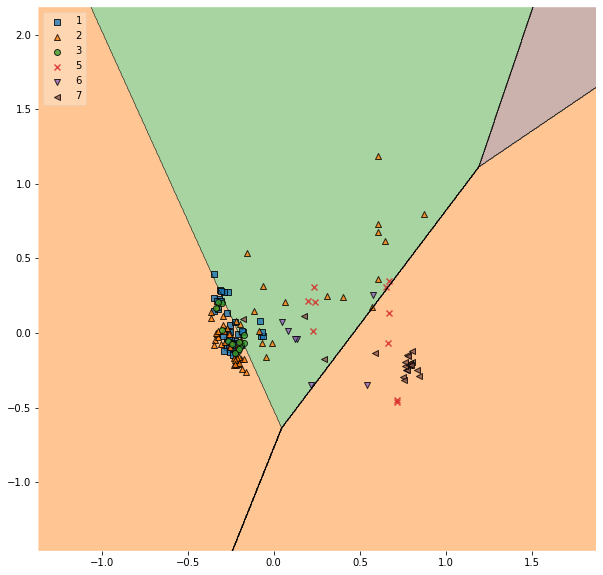

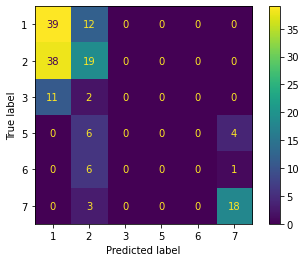

In [373]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver = 'lbfgs', max_iter=300, multi_class='ovr')
lgr.fit(trainXNormal, trainY)
prediction = lgr.predict(testNormal)


pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(trainXNormal)
lgr.fit(X_train2, trainY)
plot.figure(figsize=(10,10))
plot_decision_regions(X_train2, trainY, clf=lgr, legend=2)
plot_confusion_matrix(lgr, X_train2, trainY)


print('The accuracy of logistic regression is ' + str(metrics.accuracy_score(testY, prediction)))

This model should not be used, you can see in the decision matrix and in the decision surface graph that there are major errors here, along with the accuracy of the model.

Look at decision trees

The accuracy of decision tree is 0.7407407407407407


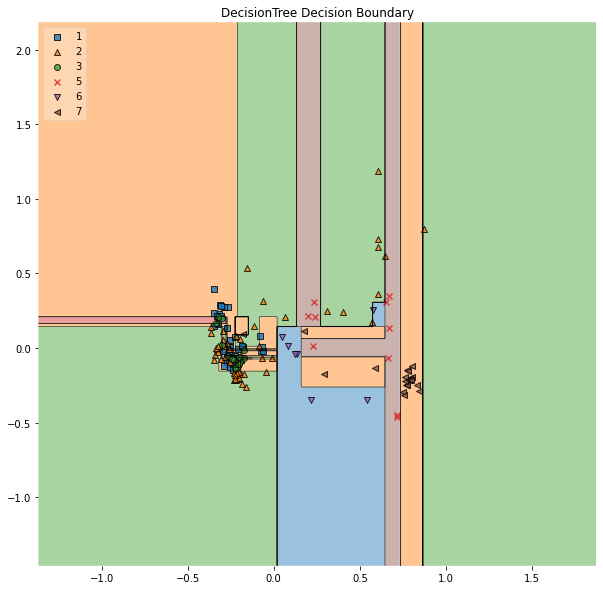

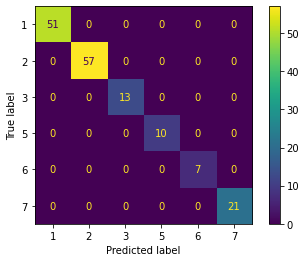

In [374]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', random_state=0)
dt.fit(trainXNormal, trainY)
prediction = dt.predict(testNormal)



pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(trainXNormal)
dt.fit(X_train2, trainY)
plot.figure(figsize=(10,10))
plot.title('DecisionTree Decision Boundary')
plot_decision_regions(X_train2, trainY, clf=dt, legend=2)
plot_confusion_matrix(dt, X_train2, trainY)



print('The accuracy of decision tree is ' + str(metrics.accuracy_score(testY, prediction)))

We try to select only the most important features to see if this will improve the accuracy of any one of our models using the random forest classifier that we did before.

In [375]:
glass2 = glass[['Al', 'Ba', 'RI', 'Mg', 'Type']]
train2, test2 = train_test_split(glass2, test_size=.25, random_state=0, stratify=glass2['Type'])
trainx2 = train2[train2.columns[:4]]
testx2 = test2[test2.columns[:4]]
trainy2 = train2['Type']
testy2 = test2['Type']

The accuracy of KNN is 0.6851851851851852


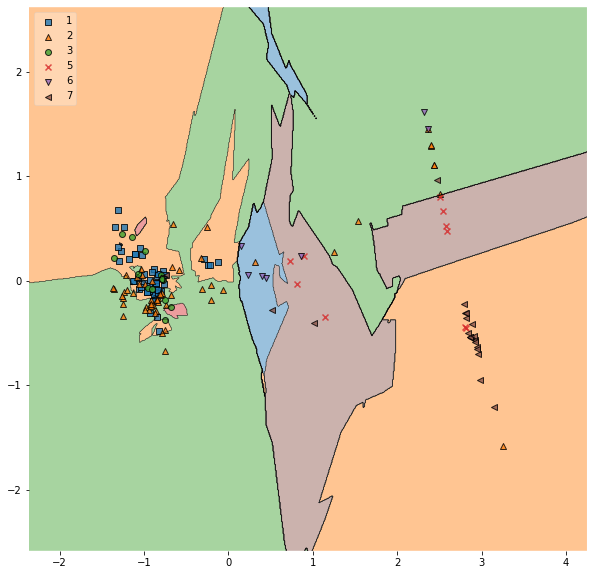

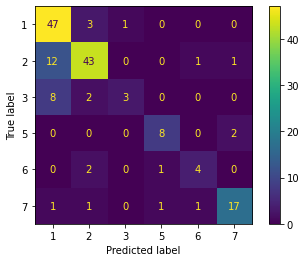

In [376]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainx2, trainy2)
prediction = knn.predict(testx2)

if type(trainy2) is np.ndarray:
    print('Already verified')
    
else:
    trainy2 = trainy2.to_numpy()


pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(trainx2)
knn.fit(X_train2, trainY)
plot.figure(figsize=(10,10))
plot_decision_regions(X_train2, trainy2, clf=knn, legend=2)
plot_confusion_matrix(knn, X_train2, trainy2)



print('The accuracy of KNN is ' + str(metrics.accuracy_score(testy2, prediction)))

The accuracy of logistic regression is 0.6666666666666666


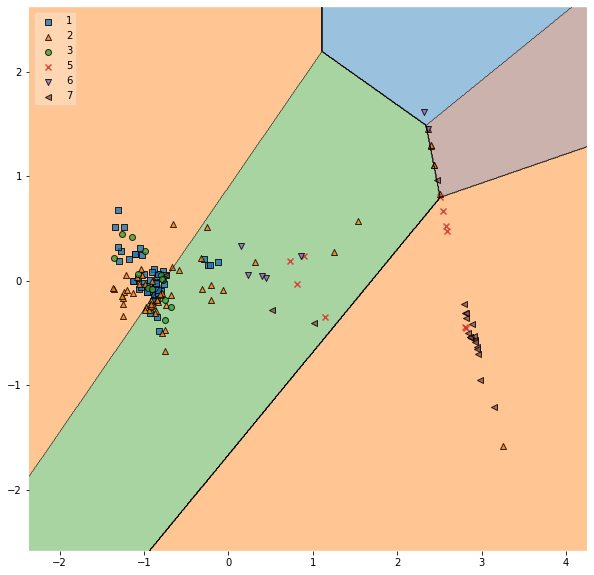

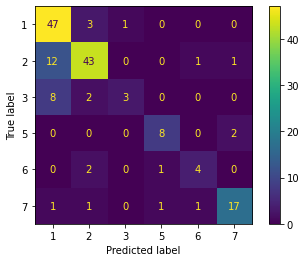

In [377]:
lgr = LogisticRegression(solver = 'lbfgs', max_iter=400, multi_class='ovr')
lgr.fit(trainx2, trainy2)
prediction = lgr.predict(testx2)

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(trainx2)
lgr.fit(X_train2, trainY)
plot.figure(figsize=(10,10))
plot_decision_regions(X_train2, trainy2, clf=lgr, legend=2)
plot_confusion_matrix(knn, X_train2, trainy2)

print('The accuracy of logistic regression is ' + str(metrics.accuracy_score(testy2, prediction)))

The accuracy of decision tree is 0.7222222222222222


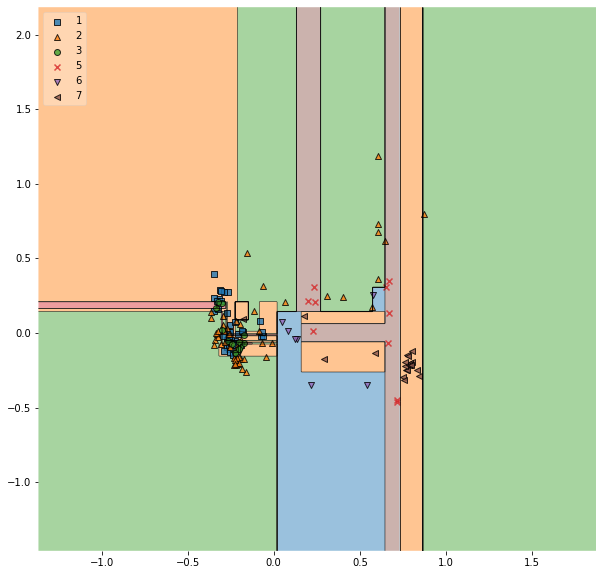

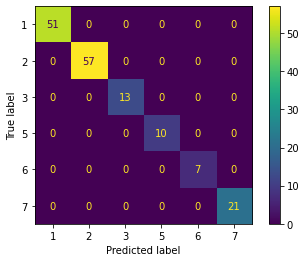

In [378]:
dt = DecisionTreeClassifier(criterion='gini', random_state=0)
dt.fit(trainx2, trainy2)
prediction = dt.predict(testx2)


pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(trainXNormal)
dt.fit(X_train2, trainy2)
plot.figure(figsize=(10,10))
plot_decision_regions(X_train2, trainy2, clf=dt, legend=2)
plot_confusion_matrix(dt, X_train2, trainy2)

print('The accuracy of decision tree is ' + str(metrics.accuracy_score(testy2, prediction)))

The accuracy for most models has went down with the attempt to select specialized features that would fit our model better, each feature then must be factored into the model. It makes sense in this example since each element is an essential component in what differentiates different glass types.

Because we have imbalanced classes we should use cross validation to test each of our models in order to make sure we have the most generalizable model possible. This is how we choose the model.

In [379]:
features = glass[glass.columns[:9]]
glassType = glass['Type']

In [380]:
knn = KNeighborsClassifier(n_neighbors = 5)
print(cross_val_score(knn, features, glassType, cv=5, scoring='accuracy').mean())

0.6060908084163898


In [381]:
logReg = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
print(cross_val_score(logReg, features, glassType, cv=5, scoring='accuracy').mean())

0.5681063122923589


In [382]:
dt = DecisionTreeClassifier(criterion='gini', random_state=0)
print(cross_val_score(dt, features, glassType, cv=5, scoring='accuracy').mean())

0.57718715393134


Out of all of the models used, KNN had the highest cross validated accuracy and the highest accuracy overall when used with all 9 features, meaning that this model should be the preferred model to use. 

The models can be improved with a more balanced dataset since type 1 glass, and type 2 glass were the main predominant glass types found in the database. KNN model along with using all 9 features had the highest accuracy overall, it didn't make sense to take out any of the features since doing so will cause a drop in terms of accuracy. 


All parameters were useful in the model, not factoring in all parameters would mean not factoring in different elements that make up glass, which will reduce the accuracy of the model. More data and data which more accuractely represent the different types of glass might be more helpful in increasing accuracy.